In [ ]:
#A PART

In [13]:
import numpy as np

Resources_Matrix = np.array([
    [100, 120],
    [80, 90],
    [60, 75]
])  # 3x2

Allocation_Factors = np.array([
    [1.1, 0.9],
    [0.95, 1.05]
])  # 2x2

Result = Resources_Matrix @ Allocation_Factors

print("Result (3x2):")
print(Result)


Result (3x2):
[[224.   216.  ]
 [173.5  166.5 ]
 [137.25 132.75]]


In [14]:
Shift_A_Production = np.array([
    [10,12,11,13,15,14,16],
    [20,22,19,21,23,24,25],
    [30,29,31,28,32,33,34]
])

Shift_B_Production = np.array([
    [8,9,10,11,12,10,9],
    [15,14,16,17,18,19,20],
    [25,24,23,22,21,20,19]
])

Total_Production = Shift_A_Production + Shift_B_Production

print("Total Production:")
print(Total_Production)


Total Production:
[[18 21 21 24 27 24 25]
 [35 36 35 38 41 43 45]
 [55 53 54 50 53 53 53]]


In [15]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

test_values = np.array([-2, 0, 2])
print(sigmoid(test_values))


[0.11920292 0.5        0.88079708]


In [16]:
def sigmoid_gradient(x):
    s = sigmoid(x)
    return s * (1 - s)

print(sigmoid_gradient(test_values))


[0.10499359 0.25       0.10499359]


In [ ]:
#C PART

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Input features
X = np.array([
    [20, 3, 4],
    [15, 5, 3],
    [30, 2, 2],
    [25, 4, 1],
    [35, 2, 3]
], dtype=float)

# Target values (Revenue)
Y = np.array([[18], [20], [22], [25], [30]], dtype=float)

print("X shape:", X.shape)
print("Y shape:", Y.shape)


X shape: (5, 3)
Y shape: (5, 1)


In [5]:
X = X / np.max(X, axis=0)

In [6]:
np.random.seed(42)

W1 = np.random.randn(3, 3)
b1 = np.zeros((1, 3))

W2 = np.random.randn(3, 1)
b2 = np.zeros((1, 1))

In [7]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

In [8]:
learning_rate = 0.01
epochs = 3000
losses = []

for epoch in range(epochs):

    # ---- Forward Propagation ----
    Z1 = X @ W1 + b1
    A1 = relu(Z1)

    Z2 = A1 @ W2 + b2
    A2 = Z2  # Linear output

    # ---- Loss (MSE) ----
    loss = np.mean((A2 - Y) ** 2)
    losses.append(loss)

    # ---- Backpropagation ----
    dA2 = 2 * (A2 - Y) / Y.shape[0]
    dZ2 = dA2

    dW2 = A1.T @ dZ2
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * relu_derivative(Z1)

    dW1 = X.T @ dZ1
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # ---- Update ----
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

In [9]:
print("Final W1:\n", W1)
print("Final b1:\n", b1)
print("Final W2:\n", W2)
print("Final b2:\n", b2)

Final W1:
 [[ 7.15972969 -0.99648706  0.52785639]
 [ 4.13673723 -0.62227519 -0.30732539]
 [ 1.06228642  0.6032171  -0.54093041]]
Final b1:
 [[-4.46617244  1.04016596 -0.13825023]]
Final W2:
 [[ 5.91823124]
 [-0.96239098]
 [-0.40790434]]
Final b2:
 [[0.1940596]]


In [10]:
Z1 = X @ W1 + b1
A1 = relu(Z1)
predictions = A1 @ W2 + b2

print("Predictions:")
print(predictions)

Predictions:
[[18.27723376]
 [20.69279006]
 [22.78841888]
 [25.18604931]
 [30.40527839]]


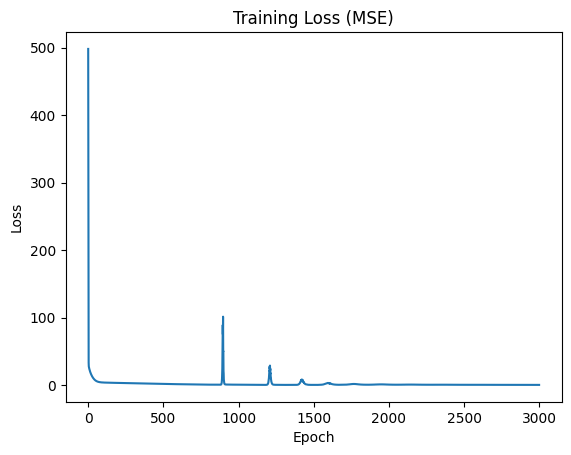

In [11]:
plt.figure()
plt.plot(losses)
plt.title("Training Loss (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()